In [159]:
# import all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import os
%matplotlib inline

In [160]:
# extract all data from zipfile downloaded from Kaggle
with zipfile.ZipFile('new-york-city-airbnb-open-data.zip','r') as file:
    file.extractall()

In [161]:
# check 
os.listdir()

['.DS_Store',
 'New_York_City_.png',
 'New York City Airbnb Data Analysis.ipynb',
 'new-york-city-airbnb-open-data.zip',
 '.ipynb_checkpoints',
 'AB_NYC_2019.csv']

## Assess

In [162]:
# import csv file into notebook and view the first a few rows
listing = pd.read_csv('AB_NYC_2019.csv')
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [163]:
# last a few rows
listing.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [164]:
# check the properties of columns
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

By calling info() function, we found a few columns with null values: `name`, `host_name`, `last_review`,`reviews_per_month`. Among those variables, `name` and `host_name` are not that important. 

In [165]:
# Sample a few records 
listing.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
47584,35810926,Stylish and Comfortable 3 Bedrooms in Williams...,185968630,Eli,Brooklyn,Williamsburg,40.71115,-73.94371,Entire home/apt,210,3,1,2019-06-27,1.00,1,254
10489,8044856,Williamsburg/Billburg/The Burg,42404417,Erin,Brooklyn,Williamsburg,40.71848,-73.95834,Entire home/apt,135,4,54,2019-06-22,1.17,1,158
28890,22276159,Affordable private room in a home in NYC,12258594,Rosa,Staten Island,St. George,40.64497,-74.08456,Private room,75,2,10,2019-07-01,0.53,2,207
30323,23437788,Premier Location 2 Blocks to Central Park E. 6...,56283770,Lia,Manhattan,Upper East Side,40.76483,-73.96675,Entire home/apt,225,30,1,2018-08-16,0.09,6,240
675,253803,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73708,-73.95271,Entire home/apt,199,3,23,2019-06-22,0.26,28,60


In [166]:
# summarize statistics for numeric variables
listing[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [167]:
# inspect the listing whose minimum_nights is 1250
listing[listing.minimum_nights == 1250]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


In [168]:
# see how many room types do we have
listing.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [169]:
# see how many neighbourhood groups
listing.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

- `name`,`host_name`, `last_review` are not necessary columns
- `neighbourhood_group`,`neighbourhood`,`room_type` should be categorical data
- `reviews_per_month` has more than 10,000 null values
- listings with price as 0 should not exist

## Clean
#### Define
- Drop all unnecessary columns (`name`,`host_name`, `last_review`)
- Change data types for `neighbourhood_group`,`neighbourhood`,`room_type` to categorical data
- Fill all NA values in `reviews_per_month` as 0
- Drop all listings with price as 0

#### Code

In [170]:
# create a copied dataframe for listing
listings = listing.copy()

In [171]:
# drop unwanted columns
listings.drop(['name','host_name', 'last_review'], axis=1,inplace=True)

In [172]:
# change data types for specified columns from 'object' to 'categorical'
listings[['neighbourhood_group','neighbourhood','room_type']] = listings[['neighbourhood_group','neighbourhood','room_type']].astype('category')

In [173]:
# fill NA values in reviews_per_month as 0
listings['reviews_per_month'].fillna(0,inplace = True)

In [174]:
# drop all listings of price 0
listings.drop(listings[listings['price'] == 0].index.values, axis = 0,inplace=True)

#### Test

In [175]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
id                                48884 non-null int64
host_id                           48884 non-null int64
neighbourhood_group               48884 non-null category
neighbourhood                     48884 non-null category
latitude                          48884 non-null float64
longitude                         48884 non-null float64
room_type                         48884 non-null category
price                             48884 non-null int64
minimum_nights                    48884 non-null int64
number_of_reviews                 48884 non-null int64
reviews_per_month                 48884 non-null float64
calculated_host_listings_count    48884 non-null int64
availability_365                  48884 non-null int64
dtypes: category(3), float64(3), int64(7)
memory usage: 4.3 MB


## Visualizing data

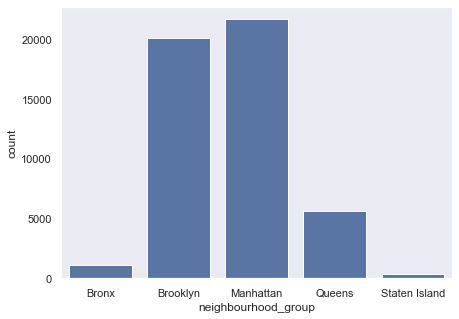

In [176]:
# plot countplot for neighbourhood group
plt.figure(figsize=(7,5))
color_base = sb.color_palette()[0]
sb.countplot(data=listings, x='neighbourhood_group',color=color_base);

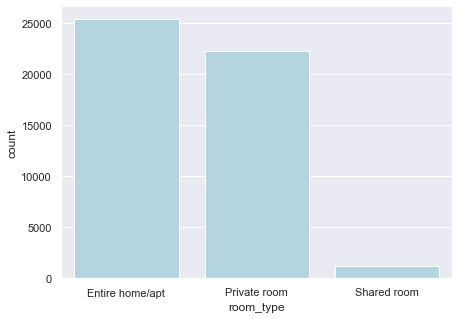

In [177]:
# plot countplot for neighbourhood group
plt.figure(figsize=(7,5))
sb.set()
color_base = sb.color_palette()[0]
sb.countplot(data=listings, x='room_type',color='lightblue');

In [178]:
# plot the countplot for top 10 popular neighbourhoods
top10_neighbour_name = listings.neighbourhood.value_counts().index.values[:10]
top10_neighbour = listings[listings['neighbourhood'].isin(top10_neighbour_name)].neighbourhood.astype(str)

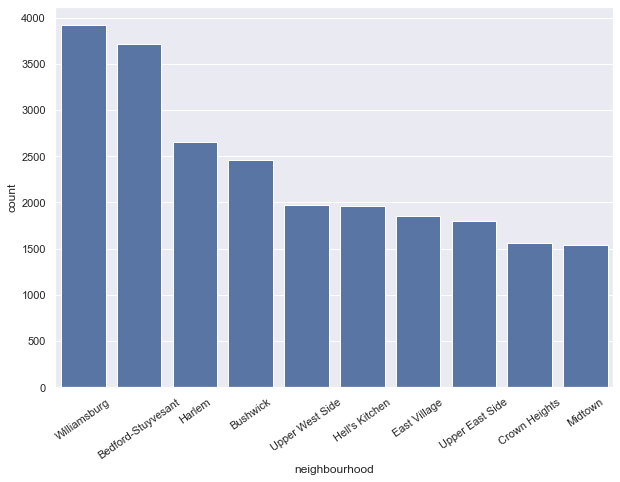

In [179]:
# plot the counts by neighbourhood for top 10 popular neighbourhoods
plt.figure(figsize=(10,7))
color_base1 = sb.color_palette()[0]
sb.countplot(top10_neighbour,order=top10_neighbour_name,color=color_base1)
plt.xticks(rotation = 35);

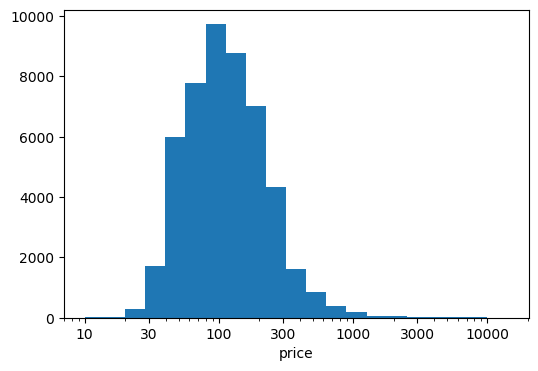

In [214]:
# plot the histograms for numeric interested variables
plt.figure(figsize = (6,4))
sb.reset_defaults()
bins = 10**np.arange(1, np.log10(listings['price'].max())+0.15,0.15)
plt.hist(data=listings, x='price',bins=bins)
plt.xscale('log')
tick_locs = [10,30,100,300,1000,3000,10000]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('price',fontsize=10);

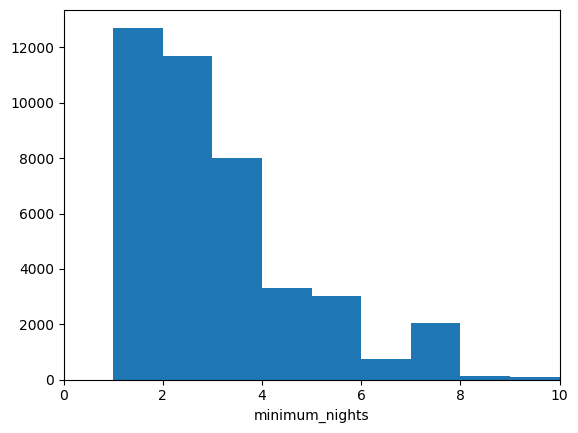

In [225]:
# Plot histogram of minimum nights 
bins = np.arange(1,listings['minimum_nights'].max()+1, 1)
plt.hist(data=listings,x='minimum_nights',bins=bins)
plt.xlim(0,10)
plt.xlabel('minimum_nights');

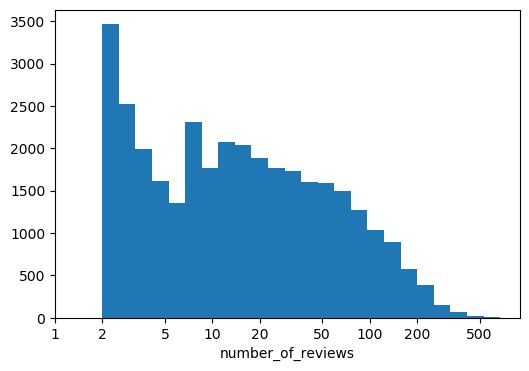

In [243]:
# plot histogram of number_of_reviews
plt.figure(figsize = (6,4))
bins = 2**np.arange(1, np.log2(listings['number_of_reviews'].max())+0.35,0.35)
plt.hist(data=listings, x='number_of_reviews',bins=bins)
plt.xscale('log',basex=2)
tick_locs = [1,2,5,10,20,50,100,200,500]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('number_of_reviews',fontsize=10);

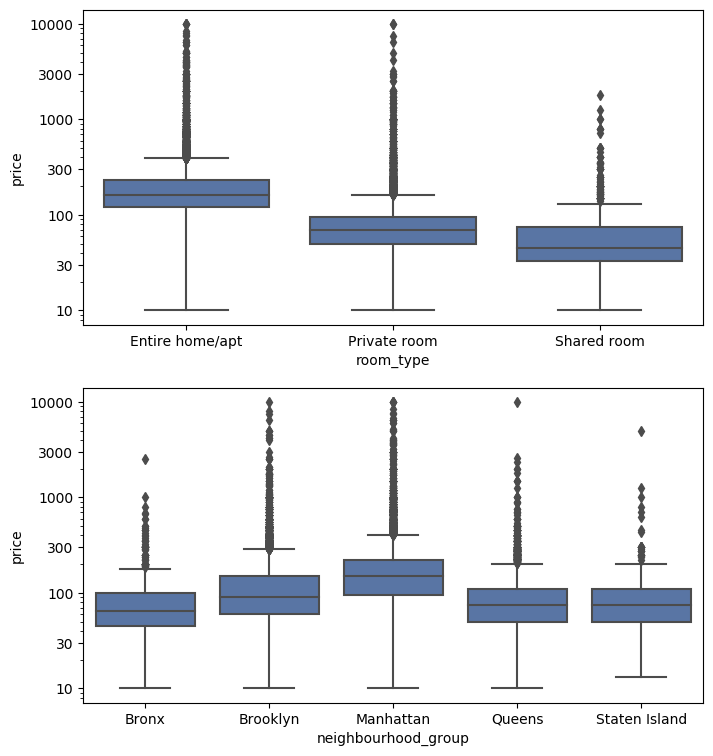

In [262]:
# plot price by room type and neighbourhood_group
room_neighbour = ['room_type','neighbourhood_group']
fig, ax = plt.subplots(nrows=2, figsize=(8,9))

for i in range(2):
    sb.boxplot(data=listings, x=room_neighbour[i],y='price',color=color_base, ax=ax[i])
    ax[i].set_yscale('log')
    tick_locs = [10,30,100,300,1000,3000,10000]
    ax[i].set_yticks(tick_locs)
    ax[i].set_yticklabels(tick_locs);

- From the boxplots above, we can see that Entire home/apt takes the highest price compared to the other two categories. No wonder that Shared room takes the lowest price
- Manhattan's median price is the highest which is in line with the level of prosperity

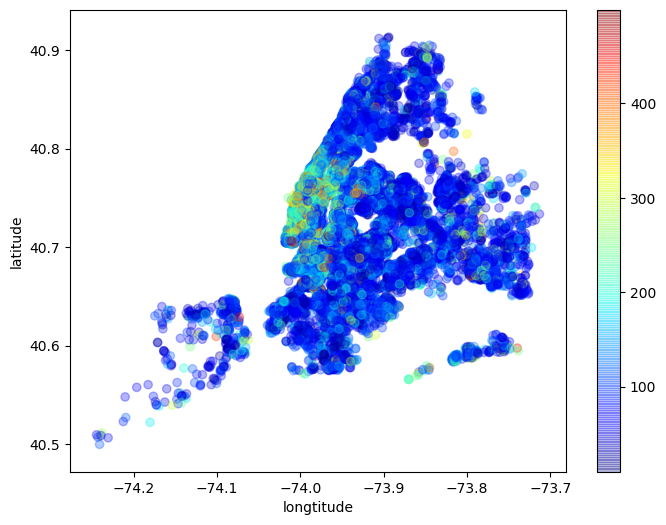

In [280]:
# plot price by longtitude and latitude
plt.figure(figsize=(8,6))

listings_less500 = listings[listings.price < 500]
plt.scatter(data=listings_less500,x='longitude', y='latitude', c='price', alpha=0.3,cmap='jet');
plt.colorbar()
plt.xlabel('longtitude')
plt.ylabel('latitude');

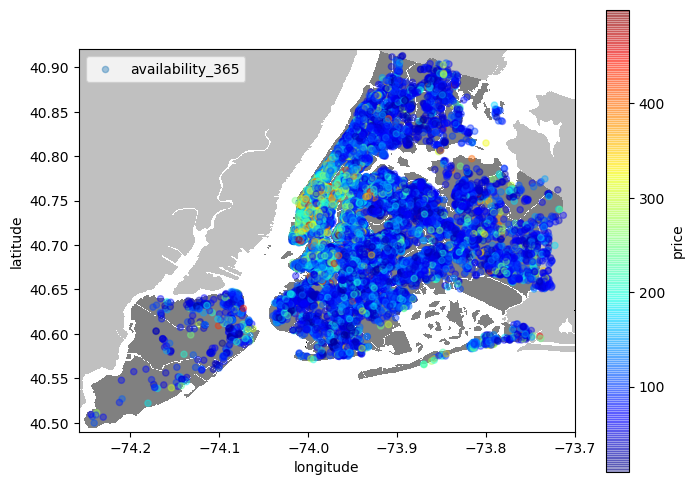

In [278]:
import urllib
#initializing the figure size
plt.figure(figsize=(8,6))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
listings_less500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()